# 1) სასურველი სტრიქონების და სვეტების გამოტანა

In [2]:
import pandas as pd



In [77]:
file_path = 'survey_results_public.csv'
df = pd.read_csv(file_path)


In [22]:
# პირველი და მესამე ინდექსებით მწკრივების შენახვა
selected_rows = df.loc[[1, 3]]

# სვეტების შენახვა რომლებსაც ქვიათ MainBranch და Age
selected_columns = df[['MainBranch', 'Age']]

In [24]:
print(selected_columns)

                           MainBranch                 Age
0                       None of these     18-24 years old
1      I am a developer by profession     25-34 years old
2      I am a developer by profession     45-54 years old
3      I am a developer by profession     25-34 years old
4      I am a developer by profession     25-34 years old
...                               ...                 ...
89179  I am a developer by profession     25-34 years old
89180  I am a developer by profession     18-24 years old
89181     I code primarily as a hobby   Prefer not to say
89182  I am a developer by profession  Under 18 years old
89183  I am a developer by profession     35-44 years old

[89184 rows x 2 columns]


In [23]:
print(selected_rows)

   ResponseId     Q120                      MainBranch              Age  \
1           2  I agree  I am a developer by profession  25-34 years old   
2           3  I agree  I am a developer by profession  45-54 years old   

            Employment                            RemoteWork  \
1  Employed, full-time                                Remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   

                                    CodingActivities  \
1  Hobby;Contribute to open-source projects;Boots...   
2  Hobby;Professional development or self-paced l...   

                                        EdLevel  \
1  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
1  Books / Physical media;Colleague;Friend or fam...   
2  Books / Physical media;Colleague;On the job tr...   

                                     LearnCodeOnline  ...        Frequency_1  \
1  Formal

## 2) დაუნიშნეთ ინდექსირება ცხრილის კონკრეტული სვეტის მიმართ

In [31]:
df_indexed = df.set_index('Currency')

In [32]:
df_indexed

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
Currency,,,,,,,,,,,,,,,,,,,,,
NaN,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USD\tUnited States dollar,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
USD\tUnited States dollar,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
USD\tUnited States dollar,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
PHP\tPhilippine peso,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRL\tBrazilian real,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
NaN,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
NaN,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN


### 3) შექმნით 2 პარამეტრზე დამოკიდებულ ფილტრს. დაბეჭდეთ შესაბამისი ცხრილი.

In [59]:
desired_remote_work_status = 'Remote'
desired_age = '18-24 years old'



In [60]:
filter_condition_remote = df['RemoteWork'] == desired_remote_work_status
filter_condition_age = df['Age']  == desired_age

In [61]:
filtered_df = df.loc[filter_condition_remote & filter_condition_age, ['RemoteWork', 'Age']]
# აქ ვფილტრავ იმ ადამიანებს რომლებიც მუშაობენ დისტანციურად და არიან 18წელზე მეტის მაგრამ 24ზე ნაკლების

In [62]:
filtered_df

,RemoteWork,Age
78,Remote,18-24 years old
104,Remote,18-24 years old
146,Remote,18-24 years old
209,Remote,18-24 years old
227,Remote,18-24 years old
...,...,...
89105,Remote,18-24 years old
89119,Remote,18-24 years old
89124,Remote,18-24 years old
89164,Remote,18-24 years old


# 4) დაასორტირეთ ცხრილი 2 პარამეტრის გამოყენებით

In [70]:
df_sorted = df.sort_values(by=['ResponseId', 'MainBranch'], ascending=[True, False])

In [81]:
# ვასორტირებ ResponseId-ის ზრდადობით
df_sorted

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


# გამოიყენეთ კონკრეტული სვეტის მნიშვნელობისთვის სტატისტიკური ფუნქციები (mean, standard deviation, median, min, max).

In [82]:
mean_value = df['WorkExp'].mean()
std_deviation = df['WorkExp'].std()
median_value = df['WorkExp'].median()
min_value = df['WorkExp'].min()
max_value = df['WorkExp'].max()


In [84]:
# გამომაქვს სამუშაო გამოცდილების მინიმალური, მაქსიმულარი, საშუალო და სხვა სტატისტიკური მნიშნვლებობები
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Median: {median_value}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")

Mean: 11.405126322311204
Standard Deviation: 9.05198941848756
Median: 9.0
Min: 0.0
Max: 50.0


# Numpy და Matplotlib-ის ბიბლიოთეკების გამოყენებით ააგეთ 2 სხვადასხვა ტიპის გრაფიკი (მაგ. Bar დახაზოვანი დიაგრამები).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([10, 20, 15, 25, 30])
y2 = np.array([30, 25, 15, 20, 10])

# Bar graph
plt.figure(figsize=(8, 4))
plt.bar(x, y1, color='blue', label='Y1')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Bar Graph')
plt.legend()
plt.show()

# Line plot
plt.figure(figsize=(8, 4))
plt.plot(x, y2, marker='o', color='red', label='Y2')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x = np.array(['A', 'B', 'C', 'D', 'E'])
y1 = np.array([10, 20, 15, 25, 30])
y2 = np.array([30, 25, 15, 20, 10])

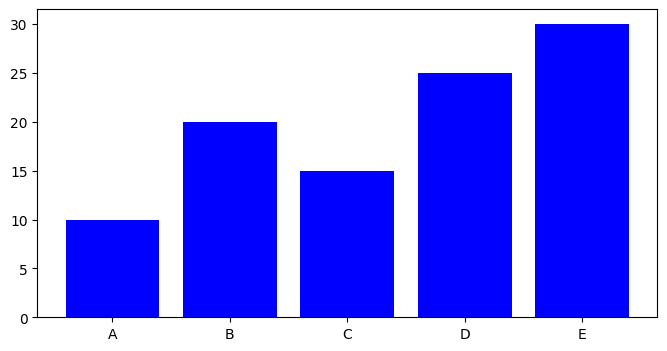

In [19]:
# ბარ ტიპის დიაგრამა
plt.figure(figsize=(8, 4))
plt.bar(x, y1, color='blue', label='Y1')
plt.show()

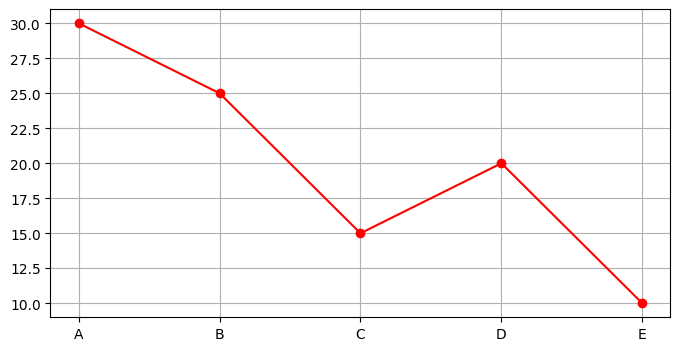

In [27]:
# ხაზოვანი დიაგრამა
plt.figure(figsize=(8, 4))
plt.plot(x, y2, marker='o', color='red', label='Y2')
plt.grid(True)
plt.show()